<a href="https://colab.research.google.com/github/avinashmane/colab/blob/master/strava_likers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Code/Parameters
* Setup
    * needs
        * auth
        * gsheet auth
        * cfg_strava
* updates sheets
* Todo
    * low: error: location not found 

## Config

In [1]:
repo='https://github.com/avinashmane/colab.git'
import os,sys
if os.name=='nt':
    LIB= r'c:\m\lib'
    LOG= r'c:\m\social-media-automation'
    AUTH= r'c:\i\auth'
    sys.path.append("./lib")
else:
    if not os.path.exists('drive'):
        from google.colab import drive
        drive.mount('/content/drive')
    LIB='/content/drive/MyDrive/m/lib'
    LOG='/content/drive/MyDrive/m/lib'
    AUTH='/content/drive/MyDrive/m/auth'
    if not os.path.exists('m'):
      !ln -sd '/content/drive/MyDrive/m/' m
    if not os.path.exists('repo'):
      !git clone $repo repo
    sys.path.append('repo')
    sys.path.append("repo/lib")
sys.path.append(LIB)


In [2]:
import yaml
cfg=yaml.load(u"""
repo:
    https://github.com/avinashmane/colab.git
packages: 
- chromium-chromedriver
modules:
- nerodia
- pygsheets
env:
    nt:
        LIB: c:/m/lib
        LOG: c:/m/social-media-automation
        AUTH: c:/i/auth
    posix:
        LIB: /content/drive/MyDrive/m/lib
        LOG: /content/drive/MyDrive/m/lib
        AUTH: /content/drive/MyDrive/m/auth
sheets:
    stravasync:
        url: https://docs.google.com/spreadsheets/d/1Q8SA641P0aytWzPGmeHG_xuxll3Wq6phsxjb91RjgWY/edit#gid=0
        tab: Members
        range: A10:O
    StravaPromoLog:
        url: https://docs.google.com/spreadsheets/d/14a8u53o0V6jKwP1nxk0334jvKsRnW6J5hKzcaQAwUbw/edit#gid=179675201
        tab: StravaPromoLog
        
""",Loader=yaml.Loader)
for x in cfg['env'][os.name]: 
    os.environ[x]=eval(x)

import importlib
import utils
importlib.reload(utils)
utils.setup_env(cfg['packages'],cfg['modules'])

'Environment setup'

## Code

In [3]:
import yaml
from datetime import datetime
import os
from nerodia.browser import Browser
import nerodia
import re
import logging
from IPython.display import Image

import utils

import socialmediasite 
importlib.reload(socialmediasite)
Strava=socialmediasite.Strava
SocialMediaSite=socialmediasite.SocialMediaSite


In [4]:
"reach gsheet"

import gsheets
Gsheet=gsheets.Gsheet


In [5]:
df_mc=Gsheet(cfg['sheets']['stravasync']['url']).getSheetDf(cfg['sheets']['stravasync']['tab'],start='A10')

# ssl=Gsheet('stravasync')
# df_mc

# Process
## Create headless

In [6]:
" Test Selenium headless"
if True:
    if os.name=='nt':
        b=Browser('chrome',)
    else:
        
        # import sys
        # sys.path.insert(0,f'{DIR}/geckodriver')
        from selenium import webdriver

        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--headless')
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument('--disable-dev-shm-usage')
        # b =webdriver.Chrome('chromedriver',options=chrome_options)
        b=Browser('chrome',options=chrome_options,)
    
    utils.setLogger(f"{LOG}/strava-automation.log")
    

2022-08-19 11:50:07:INFO:Logger file: c:\m\social-media-automation/strava-automation.log


In [7]:
# %debug
# if os.name=='nt':
strava=Strava(b,authFile=f'{AUTH}/auth.yaml',cfgFile=f"{LIB}/cfg_strava.yaml")
strava.logGSheet = Gsheet(cfg['sheets']['StravaPromoLog']['url']).getSheetByTitle('StravaPromoLog')
strava.StravaMembers=df_mc.query('strava=="strava"').id.values

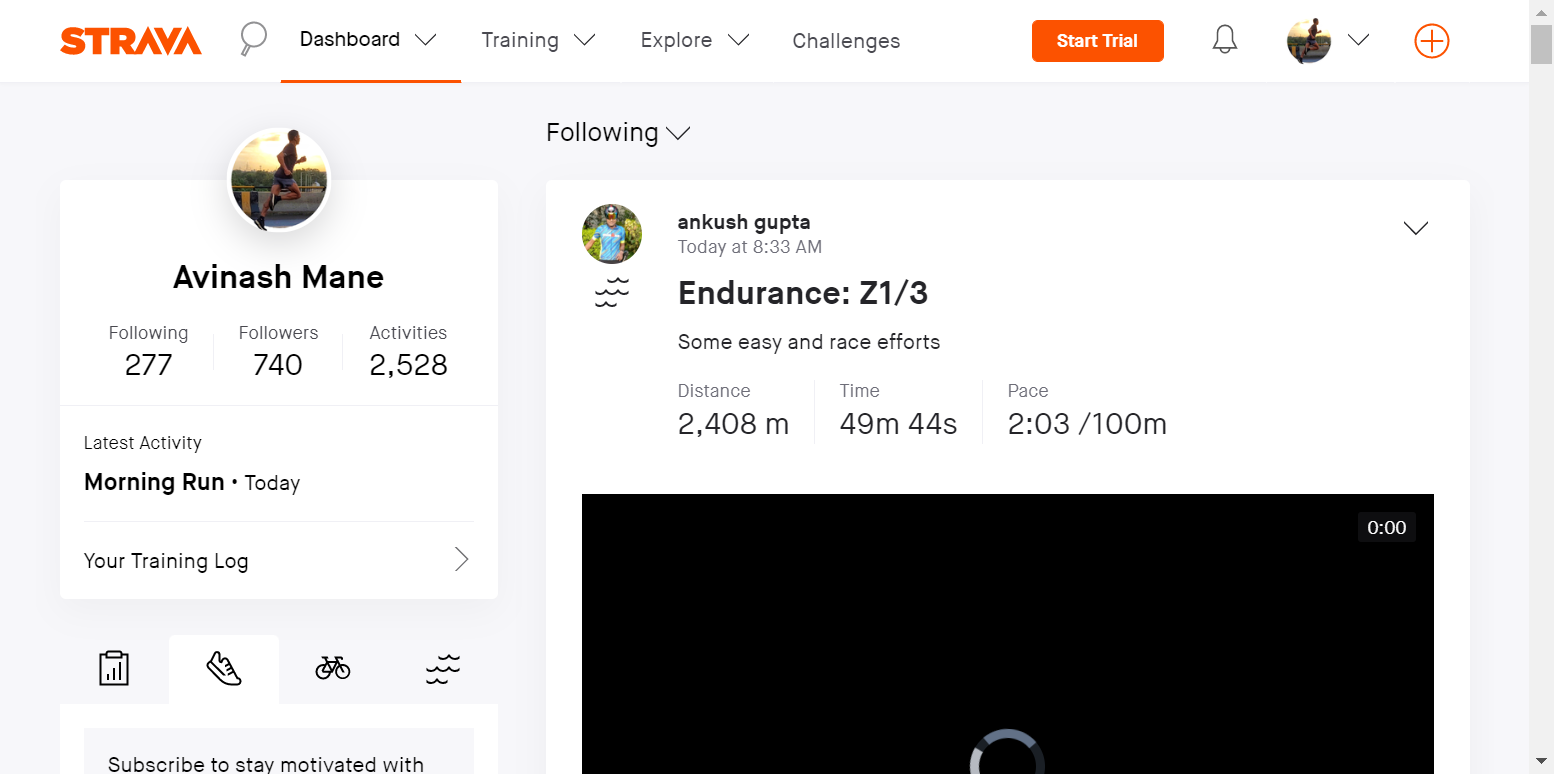

In [8]:
strava.login("avinash")

Image(b.screenshot.png())

## A. Give likes in feed

In [9]:
# b.goto('https://www.strava.com/clubs/196654/recent_activity')

strava.scrolldown(9)

In [10]:
logging.info(f"Total number of cards on {strava.browser.title}: {len(b.divs(class_name=re.compile('^EntryHeader')))}")

2022-08-19 11:50:52:INFO:Total number of cards on Dashboard | Strava: 81


In [11]:
strava.giveKudos()

2022-08-19 11:50:55:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/21013551,ankush gupta,https://www.strava.com/activities/7662527414,Endurance: Z1/3


In [12]:
# strava.logout()

## Give likes on Club

In [13]:
# b.goto('https://www.strava.com/clubs/196654/recent_activity')

for _user,_config in {
                    "avinash":"avinash",
                    "mileage_league_strava":"mileage_league_strava",
                    # "strava_pcmcrunners":"strava_pcmcrunners"
                    }.items():

    strava.login(_user)
    logging.info(f"Total number of cards on {_user}/{strava.browser.title}: {len(b.divs(class_name=re.compile('^Card')))}")
    strava.giveKudos()
    for club in strava.cfg[_config]['clubs']:
      strava.goto(f"{club}/recent_activity")
      logging.info(f"Total number of cards on {club} '{strava.browser.title}': {len(b.divs(class_name=re.compile('^Card')))}")
      strava.giveKudos()
    strava.logout()
logging.info(f"All Groups done")    

2022-08-19 11:51:11:INFO:Logged in with avinashmane@yahoo.com
2022-08-19 11:51:11:INFO:Total number of cards on avinash/Dashboard | Strava: 19
2022-08-19 11:51:17:INFO:Total number of cards on https://www.strava.com/clubs/pcmcrunners 'Pimpri-Chinchwad, Maharashtra, India Club | PCMCRunners on Strava': 20
2022-08-19 11:51:20:INFO:giveKudos: 0,24656103,https://www.strava.com/athletes/24656103,Nikhil Tapkir,https://www.strava.com/activities/7662571115,Morning Run
2022-08-19 11:51:26:INFO:Total number of cards on https://www.strava.com/clubs/pcmcbikers 'Pimpri-Chinchwad, Maharashtra, India Club | PCMC Tring Tring on Strava': 20
2022-08-19 11:51:33:INFO:Total number of cards on https://www.strava.com/clubs/punecycling 'Pune, Maharashtra, India Club | Strava Pune Cycling on Strava': 20
2022-08-19 11:51:36:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/42539477,Donato Davide Parisi,https://www.strava.com/activities/7662574125,Morning Ride
2022-08-19 11:51:38:INFO:giveKudos: 1,non

# End